<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## GDN

> Custom non-linear layer performing a somewhat-normalization of the input images taking into account local neighborhoods.

In [1]:
#|output: asis
#| echo: false
show_doc(GDN)

---

### GDN

>      GDN (in_channels, out_channels, kernel_size=3, gamma_init=0.1,
>           alpha_init=2, epsilon_init=0.5, alpha_trainable=False,
>           epsilon_trainable=False, reparam_offset=3.814697265625e-06,
>           beta_min=1e-06, apply_independently=False,
>           kernel_initializer='identity', data_format='channels_first',
>           **kwargs)

GDN custom layer.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| in_channels |  |  | Number of channels at input. |
| out_channels |  |  | Number of channels at output. |
| kernel_size | int | 3 | Kernel of the convolution. |
| gamma_init | float | 0.1 | Gamma parameter. |
| alpha_init | int | 2 | Initial value of alpha. |
| epsilon_init | float | 0.5 | Initial value of epsilon. |
| alpha_trainable | bool | False | Wether alpha is a trainable parameter. |
| epsilon_trainable | bool | False | Wether epsilon is a trainable parameter. |
| reparam_offset | float | 3.814697265625e-06 | Numerical stability trick. |
| beta_min | float | 1e-06 | Minimum value of beta. |
| apply_independently | bool | False | Wether to do grouped convolutions or not. |
| kernel_initializer | str | identity | Initialization of the convolution kernel. |
| data_format | str | channels_first | Format of the input data. |
| kwargs |  |  |  |

In [ ]:
gdn = GDN(in_channels=3, out_channels=3)

In [ ]:
input_sample = torch.rand(size=(1,3,28,28))
output_sample = gdn(input_sample).detach()

assert input_sample.shape == output_sample.shape

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


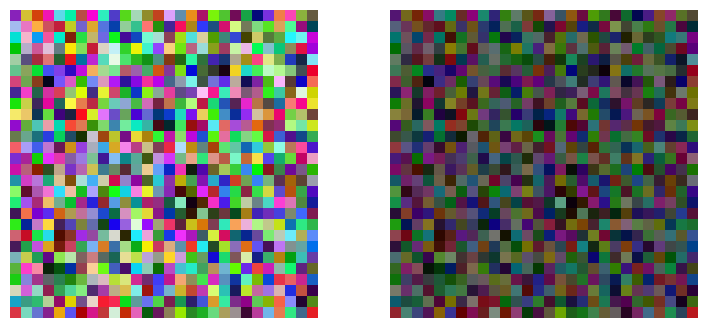

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(9,4))
axes[0].imshow(input_sample.squeeze().permute(1,2,0))
axes[1].imshow(output_sample.squeeze().permute(1,2,0))
for ax in axes: ax.axis("off")
plt.show()

## Model

> Definition of the model.

In [2]:
#|output: asis
#| echo: false
show_doc(PerceptNet)

---

### PerceptNet

>      PerceptNet (in_channels)

Basic PerceptNet architecture.

|    | **Details** |
| -- | ----------- |
| in_channels | Input channels. |

## Loss function

> The model is going to be trained to maximize the correlation between the distance in the transformed space and the MOS.

In [3]:
#|output: asis
#| echo: false
show_doc(loss_perceptnet_fn)

---

### loss_perceptnet_fn

>      loss_perceptnet_fn (imgs, mos)

|    | **Details** |
| -- | ----------- |
| imgs | Tuple of (ref_imgs, dist_imgs) in the transformed space. |
| mos | Real Mean Opinion Score |

## Testing with FastAI

> We want to train the model using `fastai`, so we have to make sure that we can use it with the library.

In [ ]:
import pandas as pd

from fastai.vision.all import *
from functools import partial

In [ ]:
dblock = DataBlock(blocks=(ImageBlock, ImageBlock, RegressionBlock),
                   getters=[ColReader(2, pref=path_ref),
                            ColReader(1, pref=path_dist),
                            ColReader(0)],
                   n_inp=2)

In [ ]:
df = pd.read_csv("../tid2008.csv", index_col=0)
df.head()

,MOS,Dist,Ref
0,5.9706,I01_01_1.bmp,I01.BMP
1,5.4167,I01_01_2.bmp,I01.BMP
2,4.5556,I01_01_3.bmp,I01.BMP
3,4.3143,I01_01_4.bmp,I01.BMP
4,6.1429,I01_02_1.bmp,I01.BMP


In [ ]:
dls = dblock.dataloaders(df, bs=32)

In [ ]:
learn = Learner(dls=dls,
                model=PerceptNet(in_channels=3),
                loss_func=loss_perceptnet_fn)

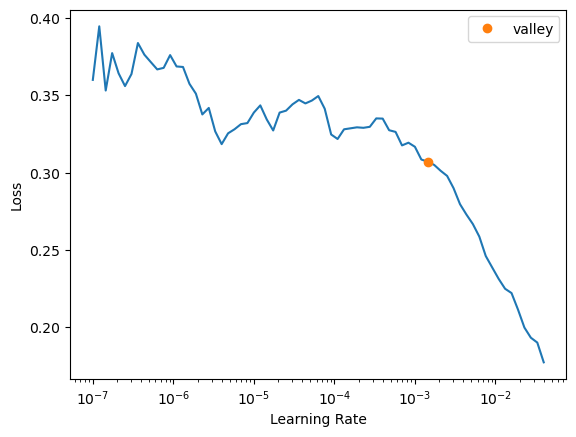

In [ ]:
lr = learn.lr_find()

In [ ]:
lr

SuggestedLRs(valley=0.0014454397605732083)